In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("../Data/CSE-CIC-IDS2018/IDS-2018-multiclass.csv")

# To display the top 5 rows
df.head(5)

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,80,6,1.518688e+09,97394212,2,1,509.0,0.0,509.0,0.0,...,32,0.0,0.0,0.0,0.0,97394209.0,0.0,97394209.0,97394209.0,DoS attacks-GoldenEye
1,80,6,1.519125e+09,1214960,3,4,20.0,964.0,20.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
2,443,6,1.519348e+09,64353745,47,71,6030.0,34581.0,890.0,0.0,...,20,6241517.0,0.0,6241517.0,6241517.0,58049582.0,0.0,58049582.0,58049582.0,Benign
3,51387,6,1.519301e+09,30,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,80,6,1.518746e+09,10482,2,0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-Hulk


In [4]:
# To display the bottom 5 rows
df.tail(5) 

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
413643,443,6,1.518607e+09,172,3,0,77.0,0.0,46.0,0.0,...,20,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,Benign
413644,53,17,1.518694e+09,2119,1,1,33.0,252.0,33.0,33.0,...,8,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,Benign
413645,80,6,1.518693e+09,106846111,15,3,2530.0,0.0,230.0,0.0,...,32,6154307.5,2.291298e+06,7774500.0,4534115.0,23634373.75,2.066686e+07,53247840.0,6656013.0,DoS attacks-Slowloris
413646,53,17,1.519810e+09,257,1,1,45.0,61.0,45.0,45.0,...,8,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,Benign
413647,22,6,1.518578e+09,379566,24,22,1912.0,2665.0,640.0,0.0,...,32,0.0,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,SSH-Bruteforce


In [5]:
# Checking the data type
df.dtypes

dst_port           int64
protocol           int64
timestamp        float64
flow_duration      int64
tot_fwd_pkts       int64
                  ...   
idle_mean        float64
idle_std         float64
idle_max         float64
idle_min         float64
label             object
Length: 80, dtype: object

In [6]:
# Total number of rows and columns before dropping duplicates
df.shape

(413648, 80)

In [7]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (22036, 80)


In [8]:
df.count()

dst_port         413648
protocol         413648
timestamp        413648
flow_duration    413648
tot_fwd_pkts     413648
                  ...  
idle_mean        413648
idle_std         413648
idle_max         413648
idle_min         413648
label            413648
Length: 80, dtype: int64

In [10]:
# Finding the null values.
print(df.isnull().sum())

dst_port         0
protocol         0
timestamp        0
flow_duration    0
tot_fwd_pkts     0
                ..
idle_mean        0
idle_std         0
idle_max         0
idle_min         0
label            0
Length: 80, dtype: int64


In [11]:
# As can be seen above seems like we have no missing data...GREAT !

In [15]:
sns.violinplot(x='protocol',y='flow duration', data=df)

ValueError: Could not interpret input 'flow duration'

In [13]:
# Finding outliers in data 
sns.boxplot(x=df['Flow Duration'])

KeyError: 'Flow Duration'

In [14]:
sns.boxplot(x=df['Tot Fwd Pkts'])

KeyError: 'Tot Fwd Pkts'

<AxesSubplot:xlabel='Tot Bwd Pkts'>

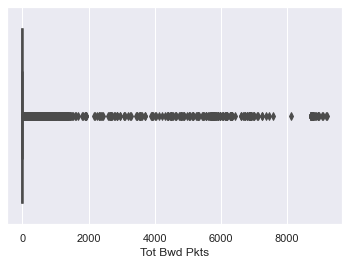

In [15]:
sns.boxplot(x=df['Tot Bwd Pkts'])

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Dst Port            421.0
Protocol              0.0
Flow Duration    406662.0
Tot Fwd Pkts          6.0
Tot Bwd Pkts          5.0
                   ...   
Active Min            0.0
Idle Mean             0.0
Idle Std              0.0
Idle Max              0.0
Idle Min              0.0
Length: 78, dtype: float64


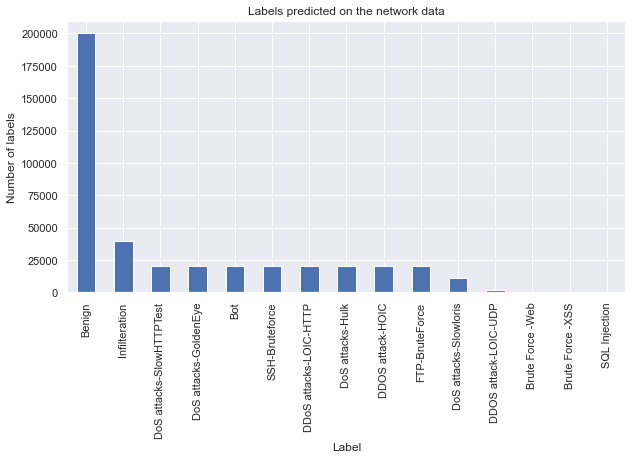

In [16]:
# Plotting a Histogram
df.label.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Labels predicted on the network data")
plt.ylabel('Number of labels')
plt.xlabel('Label');

In [17]:
# Count the number of labels across every feature
df.groupby('Label').count()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
Benign,667626,667626,667626,667626,667626,667626,667626,667626,667626,667626,...,667626,667626,667626,667626,667626,667626,667626,667626,667626,667626
FTP-BruteForce,193360,193360,193360,193360,193360,193360,193360,193360,193360,193360,...,193360,193360,193360,193360,193360,193360,193360,193360,193360,193360
SSH-Bruteforce,187589,187589,187589,187589,187589,187589,187589,187589,187589,187589,...,187589,187589,187589,187589,187589,187589,187589,187589,187589,187589


In [18]:
df['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Dst Port,1.000000,-0.149786,-0.001213,-0.027925,-0.019058,-0.006846,-0.009166,-0.136013,-0.130417,-0.151811,...,-0.132385,-0.099956,-0.004466,-0.029108,-0.018647,0.001387,-0.001392,-0.000585,-0.000859,-0.024388
Protocol,-0.149786,1.000000,-0.000735,-0.053932,-0.027186,-0.011833,-0.013706,-0.215320,0.848329,0.040990,...,-0.215707,-0.641613,-0.040010,-0.049885,-0.056074,-0.030840,-0.005845,-0.003154,-0.004062,-0.083192
Flow Duration,-0.001213,-0.000735,1.000000,-0.004347,0.002155,0.000315,0.001709,0.005057,-0.001776,0.003074,...,0.006741,0.000483,0.003740,0.007167,0.006719,0.002392,-0.741625,-0.733106,-0.727972,-0.670767
Tot Fwd Pkts,-0.027925,-0.053932,-0.004347,1.000000,0.884435,0.059293,0.876120,0.157616,-0.047845,0.087371,...,0.254347,0.009406,0.090445,0.097516,0.122811,0.072095,0.012645,0.011367,0.011825,0.048536
Tot Bwd Pkts,-0.019058,-0.027186,0.002155,0.884435,1.000000,0.061203,0.996830,0.091137,-0.024928,0.041858,...,0.175017,0.001234,0.096751,0.084795,0.120692,0.081173,0.001244,-0.000005,0.000388,0.038149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.001387,-0.030840,0.002392,0.072095,0.081173,0.007017,0.074967,0.059752,-0.024048,0.061619,...,0.069202,-0.021142,0.972357,0.034550,0.774541,1.000000,0.002494,0.000341,0.000923,0.070170
Idle Mean,-0.001392,-0.005845,-0.741625,0.012645,0.001244,0.000074,0.001126,0.000447,-0.001786,-0.000525,...,0.001713,-0.006347,0.003387,0.004003,0.003871,0.002494,1.000000,0.999595,0.999379,0.771004
Idle Std,-0.000585,-0.003154,-0.733106,0.011367,-0.000005,-0.000032,0.000040,-0.000858,-0.000790,-0.001077,...,-0.000587,-0.003623,0.000502,0.000624,0.000512,0.000341,0.999595,1.000000,0.999910,0.754046
Idle Max,-0.000859,-0.004062,-0.727972,0.011825,0.000388,-0.000001,0.000385,-0.000469,-0.001112,-0.000946,...,0.000113,-0.004550,0.001261,0.001479,0.001409,0.000923,0.999379,0.999910,1.000000,0.754073


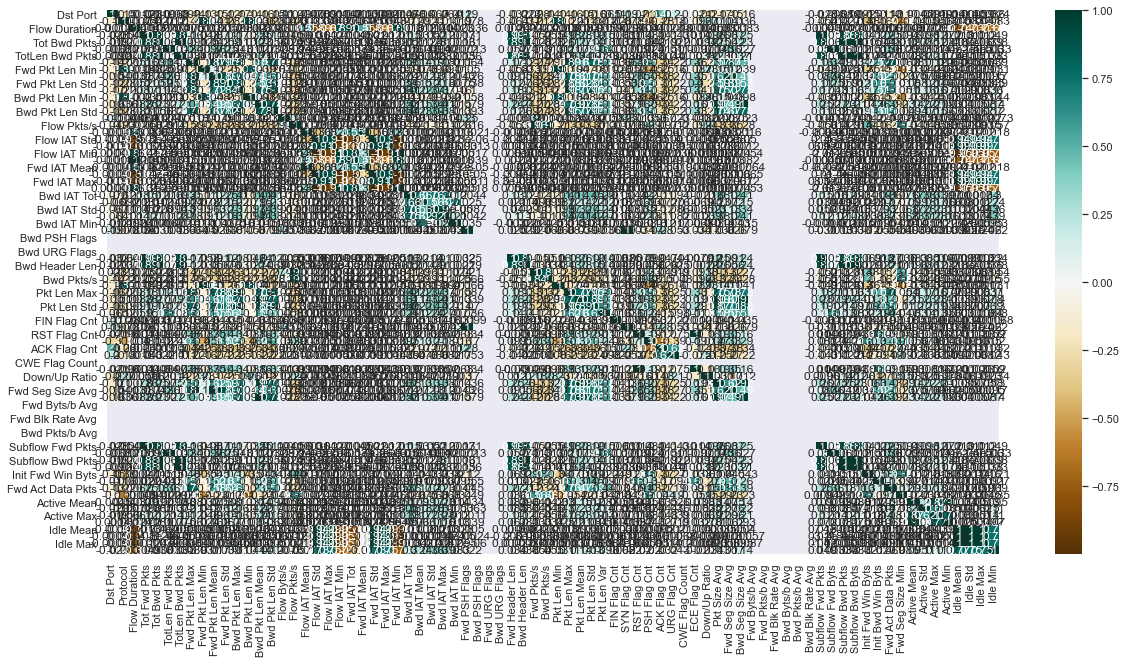

In [21]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c